Setup

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import torch
import CNN

# from config_plots import global_settings
# global_settings()
import warnings
warnings.filterwarnings("ignore")

Hyper parameters

In [2]:
# defining global variables
experimentName = "test_22987_suffix50_11_dataLoader3_compare_pretrained"
showListOfSpecies = False

from configParser import ConfigParser, getModelName
config_parser = ConfigParser(experimentName)

import os
experimentName = os.path.join(experimentName, "selected-multi-trial")
import TrialStatistics
ts = TrialStatistics.TrialStatistics(experimentName)

Use_dataLoader = 3
if Use_dataLoader == 3:
    import dataLoader3 as dataLoader
elif Use_dataLoader == 2:
    import dataLoader2 as dataLoader
else:
    import dataLoader 

Cuda support

In [3]:
# CUDA support 
if torch.cuda.is_available():
    torch.cuda.set_device(0) # 0
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    print("We are using cuda")

We are using cuda


Iterate

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
from confusion_matrix_plotter import plot_confusion_matrix2, generate_classification_report
import numpy as np
import os
import progressbar

paramsIterator = config_parser.getHyperpSelectedIter()  
number_of_experiments = sum(1 for e in paramsIterator)
paramsIterator = config_parser.getHyperpSelectedIter()    
experiment_index = 0

datasetManager = dataLoader.datasetManager(experimentName, showListOfSpecies)
with progressbar.ProgressBar(max_value=number_of_experiments) as bar:
    for experiment_params in paramsIterator:
        bar.update(experiment_index)
        experiment_params["numOfTrials"] = experiment_params["numOfTrials"] or 1

        print("experiment ", experiment_index+1, "/", number_of_experiments, ": ", experiment_params)

        # load images
        datasetManager.updateParams(experiment_params)
        dataset = datasetManager.getDataset()
        speciesList = dataset.getSpeciesList()
        numberOfSpecies = len(speciesList)

        confusionMatricesPerTrial = []

        for i in range(experiment_params["numOfTrials"]):
            trialName = os.path.join(experimentName, getModelName(experiment_params, i))

            # Train/Load model
            model = CNN.create_model(numberOfSpecies, experiment_params)
            train_loader, validation_loader, test_loader = datasetManager.getLoaders()
            if os.path.exists(CNN.getModelFile(trialName)):
                _, _, epochs, time_elapsed = CNN.loadModel(model, trialName)
                print("Model {0} loaded!".format(trialName))
            else:
                _, _, epochs, time_elapsed = CNN.trainModel(train_loader, validation_loader, experiment_params, model, trialName)

            # Update trial outcomes for statistics
            predlist, lbllist = CNN.getLoaderPredictions(test_loader, model)
            ts.addTrialPredictions(experiment_params, predlist, lbllist, numberOfSpecies)

            ts.addTrial(experiment_params,
                    {'loss': CNN.getCrossEntropyFromLoader(test_loader, model),
                     'accuracy': CNN.getAccuracyFromLoader(test_loader, model),
                     'time': time_elapsed,
                     'epochs': epochs
                    }, i)
        
        experiment_index = experiment_index + 1

N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment  1 / 7 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50}
Loading dataset...
Going through image files


100% (550 of 550) |######################| Elapsed Time: 0:00:42 Time:  0:00:42


550
torch.Size([550, 3, 224, 224])
torch.Size([550, 3, 50176])
dataset has a mean: tensor([0.7661, 0.7249, 0.6513]) and std: tensor([0.1420, 0.1753, 0.2096])
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptTrue/dataset.pkl written
using a pretrained resnet18 model...
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/trainingIndex.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/valIndex.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/testIndex.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptTrue/trainingLoader.pkl written
file /da

N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptTrue/testLoader.pkl written
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 1:08:38 Time:  1:08:38


Early stopping
total number of epochs:  328


 14% (1 of 7) |###                       | Elapsed Time: 1:10:21 ETA:   0:00:51

experiment  2 / 7 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': False, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': True, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': (16, 32, 64, 128), 'kernelSize': 5, 'patience': 50}
Loading dataset...
Going through image files


100% (550 of 550) |######################| Elapsed Time: 0:00:39 Time:  0:00:39


550
torch.Size([550, 3, 224, 224])
torch.Size([550, 3, 50176])
dataset has a mean: tensor([0.7661, 0.7249, 0.6513]) and std: tensor([0.1420, 0.1753, 0.2096])
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nTrue_ptFalse/dataset.pkl written
Loading saved indices...
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/trainingIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/valIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/testIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nTrue_ptFalse/trainingLoader.pkl written
file /data/BGNN_data/INHS_cro

N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nTrue_ptFalse/testLoader.pkl written
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:11:06 Time:  0:11:06


Early stopping
total number of epochs:  53


 28% (2 of 7) |#######                   | Elapsed Time: 1:22:59 ETA:   0:00:45

experiment  3 / 7 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': False, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': (16, 32, 64, 128), 'kernelSize': 5, 'patience': 50}
Loading dataset...


  0% (4 of 550) |                        | Elapsed Time: 0:00:00 ETA:   0:00:18

Going through image files


100% (550 of 550) |######################| Elapsed Time: 0:00:46 Time:  0:00:46


file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptFalse/dataset.pkl written
Loading saved indices...
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/trainingIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/valIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/testIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptFalse/trainingLoader.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptFalse/valLoader.pkl wr

N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptFalse/testLoader.pkl written
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:15:45 Time:  0:15:45


Early stopping
total number of epochs:  70


 42% (3 of 7) |###########               | Elapsed Time: 1:40:18 ETA:   0:00:36

experiment  4 / 7 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': False, 'imageDimension': 112, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': True, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': (16, 32, 64), 'kernelSize': 5, 'patience': 50}
Loading dataset...
Going through image files


100% (550 of 550) |######################| Elapsed Time: 0:00:40 Time:  0:00:40


550
torch.Size([550, 3, 112, 112])
torch.Size([550, 3, 12544])
dataset has a mean: tensor([0.7661, 0.7249, 0.6513]) and std: tensor([0.1402, 0.1732, 0.2069])
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d112_c3_zcaFalse_nTrue_ptFalse/dataset.pkl written
Loading saved indices...
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/trainingIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/valIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/testIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d112_c3_zcaFalse_nTrue_ptFalse/trainingLoader.pkl written
file /data/BGNN_data/INHS_cro

N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d112_c3_zcaFalse_nTrue_ptFalse/testLoader.pkl written
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:51:00 Time:  2:51:00
 57% (4 of 7) |##############            | Elapsed Time: 4:33:01 ETA:   8:38:10

experiment  5 / 7 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': False, 'imageDimension': 112, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': (16, 32, 64), 'kernelSize': 5, 'patience': 50}
Loading dataset...
Going through image files


100% (550 of 550) |######################| Elapsed Time: 0:00:37 Time:  0:00:37


file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d112_c3_zcaFalse_nFalse_ptFalse/dataset.pkl written
Loading saved indices...
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/trainingIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/valIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/testIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d112_c3_zcaFalse_nFalse_ptFalse/trainingLoader.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d112_c3_zcaFalse_nFalse_ptFalse/valLoader.pkl wr

N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d112_c3_zcaFalse_nFalse_ptFalse/testLoader.pkl written
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:19:43 Time:  0:19:43


Early stopping
total number of epochs:  117


 71% (5 of 7) |##################        | Elapsed Time: 4:53:59 ETA:   0:00:14

experiment  6 / 7 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': False, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': True, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': (16, 32), 'kernelSize': 5, 'patience': 50}
Loading dataset...
Going through image files


100% (550 of 550) |######################| Elapsed Time: 0:00:38 Time:  0:00:38


550
torch.Size([550, 3, 56, 56])
torch.Size([550, 3, 3136])
dataset has a mean: tensor([0.7661, 0.7249, 0.6513]) and std: tensor([0.1363, 0.1686, 0.2012])
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d56_c3_zcaFalse_nTrue_ptFalse/dataset.pkl written
Loading saved indices...
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/trainingIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/valIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/testIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d56_c3_zcaFalse_nTrue_ptFalse/trainingLoader.pkl written
file /data/BGNN_data/INHS_cropped/

N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d56_c3_zcaFalse_nTrue_ptFalse/testLoader.pkl written
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:13:30 Time:  0:13:30


Early stopping
total number of epochs:  85


 85% (6 of 7) |######################    | Elapsed Time: 5:08:56 ETA:   0:00:06

experiment  7 / 7 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': False, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': (16, 32), 'kernelSize': 5, 'patience': 50}
Loading dataset...
Going through image files


100% (550 of 550) |######################| Elapsed Time: 0:00:39 Time:  0:00:39


file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d56_c3_zcaFalse_nFalse_ptFalse/dataset.pkl written
Loading saved indices...
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/trainingIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/valIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/testIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d56_c3_zcaFalse_nFalse_ptFalse/trainingLoader.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d56_c3_zcaFalse_nFalse_ptFalse/valLoader.pkl writt

N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d56_c3_zcaFalse_nFalse_ptFalse/testLoader.pkl written
Training started...


100% (1000 of 1000) |####################| Elapsed Time: 1:10:24 Time:  1:10:24


Early stopping
total number of epochs:  461


100% (7 of 7) |##########################| Elapsed Time: 6:20:35 Time:  6:20:35


Analyze

In [5]:
ts.showStatistics()
ts.saveStatistics()

Aggregated statistics


In [6]:
ts.showStatistics(False)
ts.saveStatistics(False)

Raw statistics


,image_path,suffix,training_count,validation_count,usePretrained,imageDimension,n_channels,useZCAWhitening,useNormalization,batchSize,n_epochs,numOfTrials,kernels,kernelSize,patience,loss,accuracy,time,epochs,hash,trial
0,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,True,224,3,False,False,200,1000,1,16 32,5,50,0.501474,0.818182,4118.606846,329,-1971865913463684861,0
1,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,False,224,3,False,True,200,1000,1,16 32 64 128,5,50,15.619964,0.181818,666.166156,54,7720783308536220023,0
2,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,False,224,3,False,False,200,1000,1,16 32 64 128,5,50,2.922369,0.272727,945.108276,71,-6991393256231757319,0
3,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,False,112,3,False,True,200,1000,1,16 32 64,5,50,NaN,0.090909,10260.696437,1000,-1582637332725816851,0
4,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,False,112,3,False,False,200,1000,1,16 32 64,5,50,3.272938,0.100000,1183.702912,118,3507308677358650939,0
5,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,False,56,3,False,True,200,1000,1,16 32,5,50,2.164051,0.372727,810.890420,86,1853487937205261489,0
6,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,False,56,3,False,False,200,1000,1,16 32,5,50,2.378079,0.618182,4224.863024,462,-528829741090040577,0


experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50}
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptTrue/dataset.pkl read


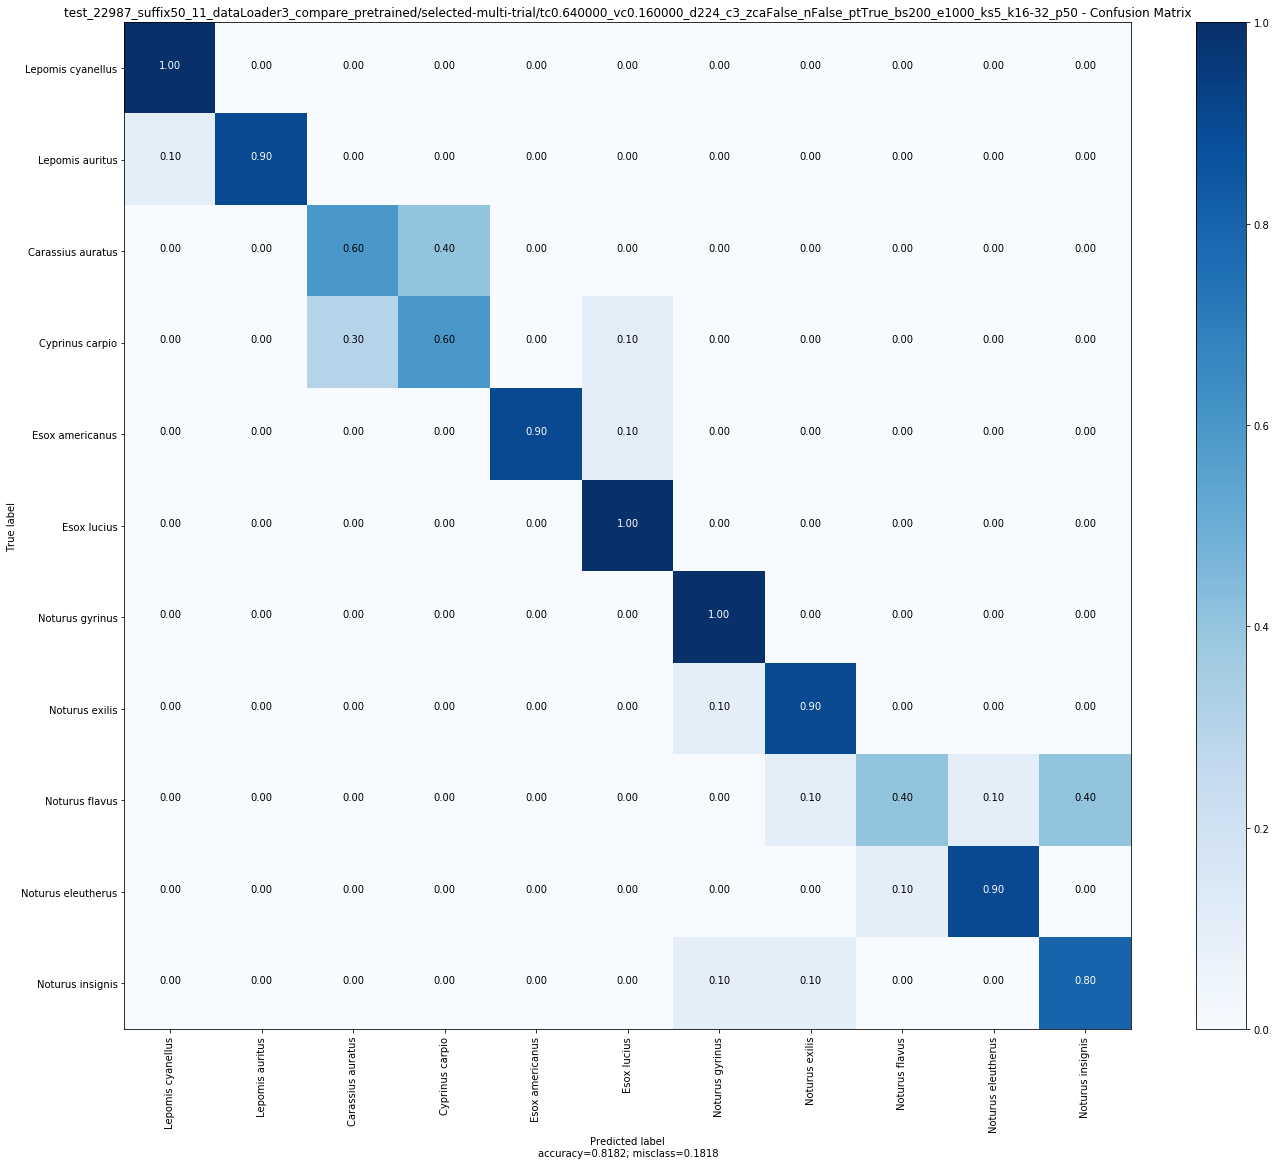

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': False, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': True, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': (16, 32, 64, 128), 'kernelSize': 5, 'patience': 50}
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nTrue_ptFalse/dataset.pkl read


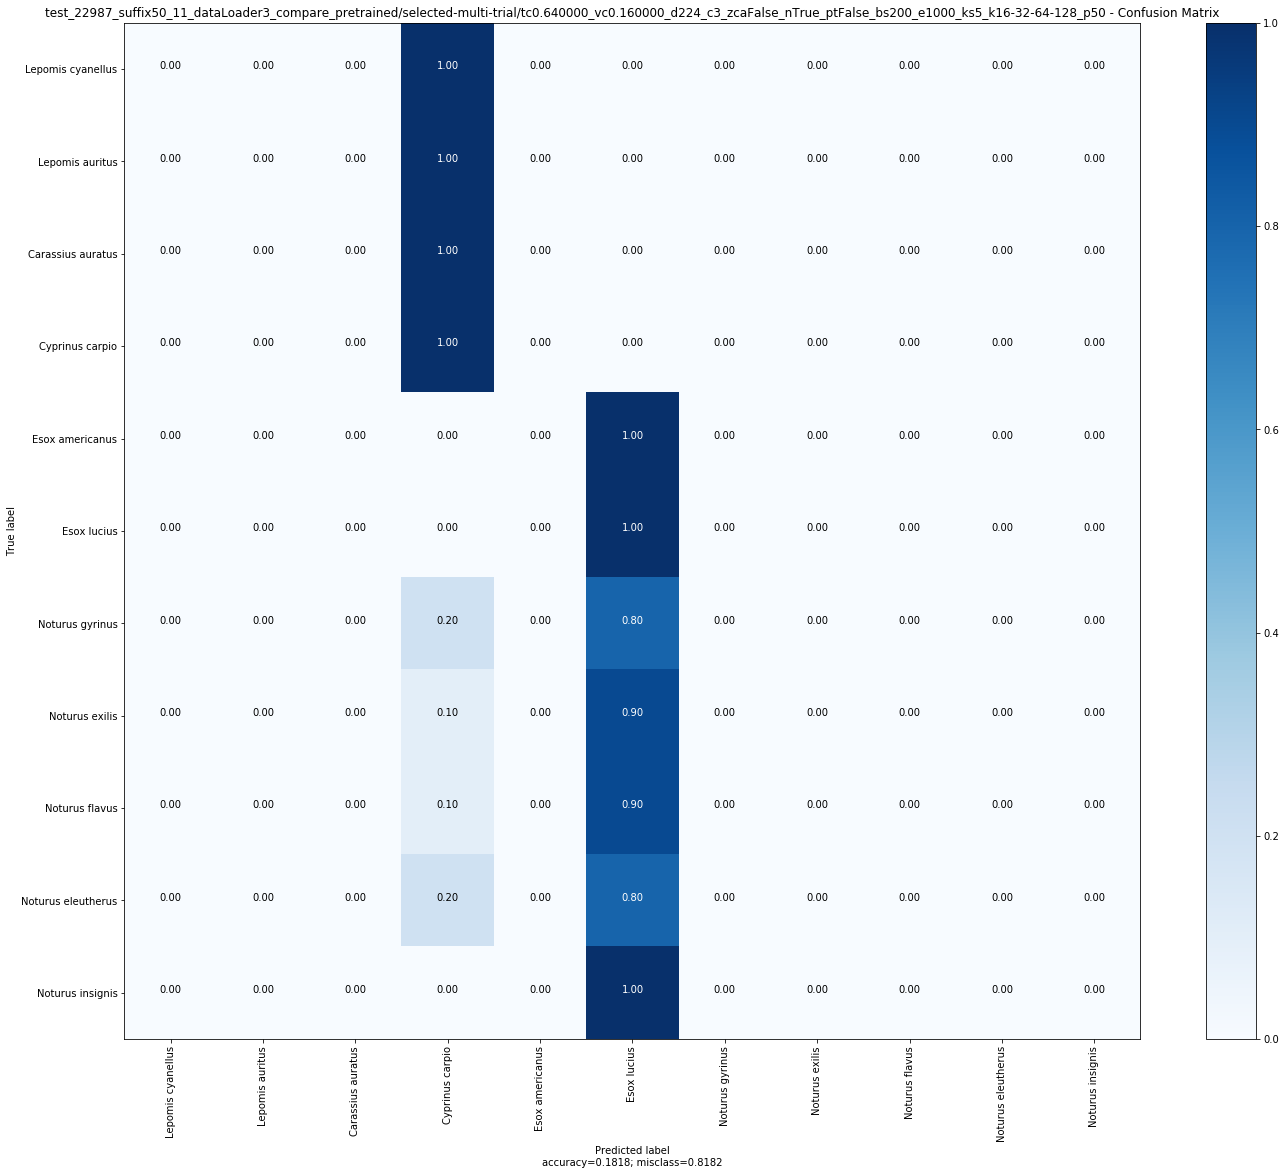

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': False, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': (16, 32, 64, 128), 'kernelSize': 5, 'patience': 50}
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d224_c3_zcaFalse_nFalse_ptFalse/dataset.pkl read


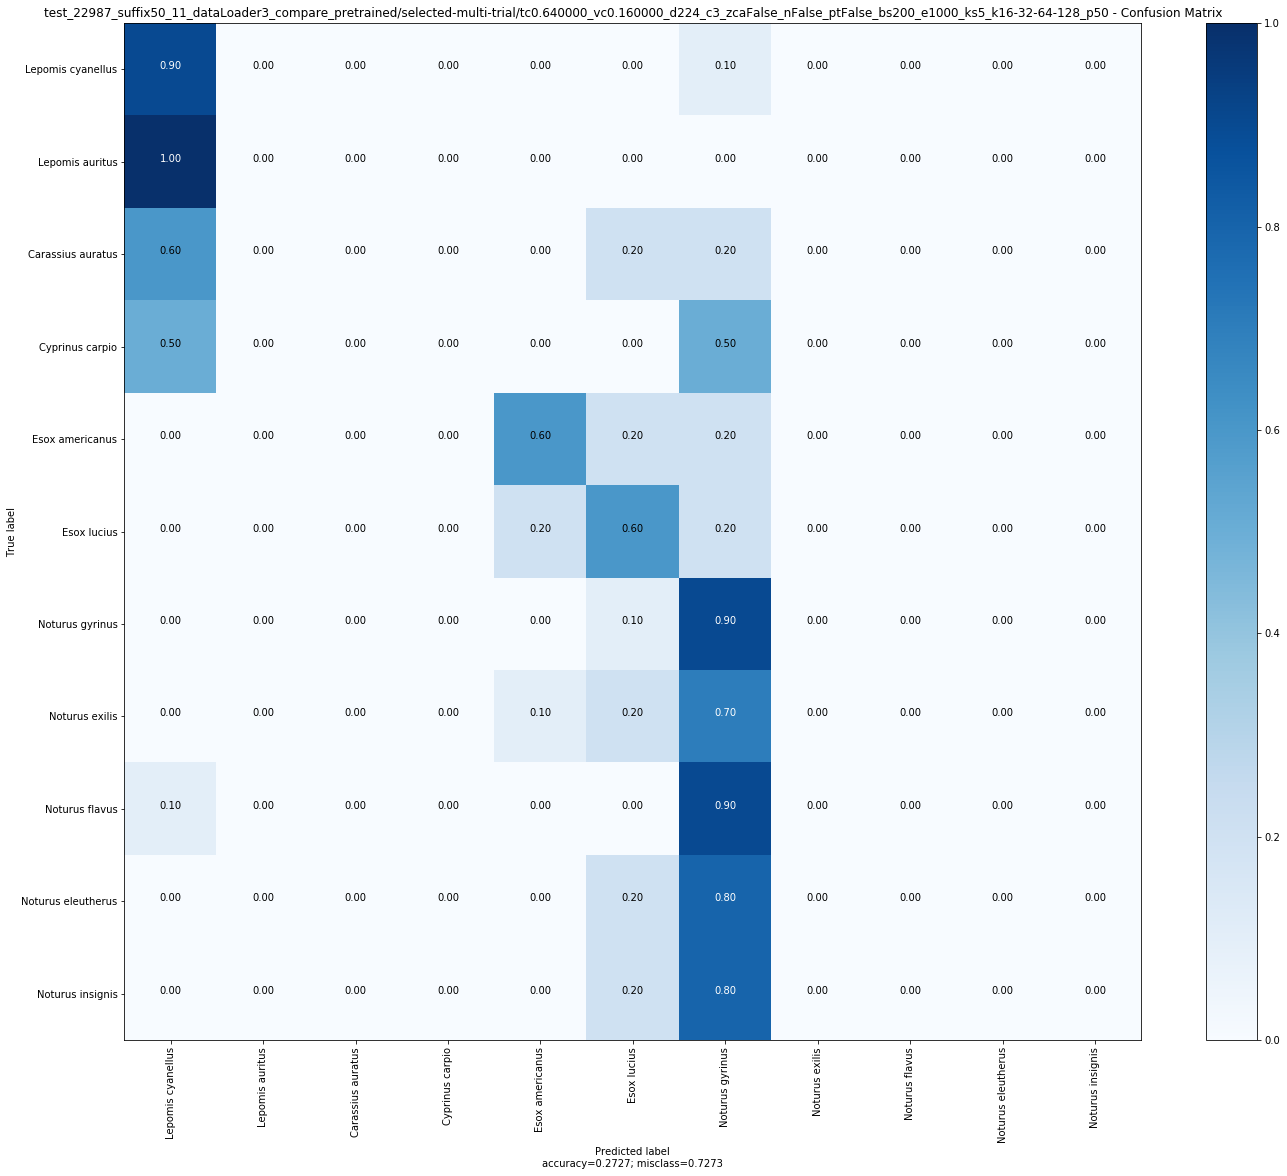

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': False, 'imageDimension': 112, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': True, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': (16, 32, 64), 'kernelSize': 5, 'patience': 50}
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d112_c3_zcaFalse_nTrue_ptFalse/dataset.pkl read


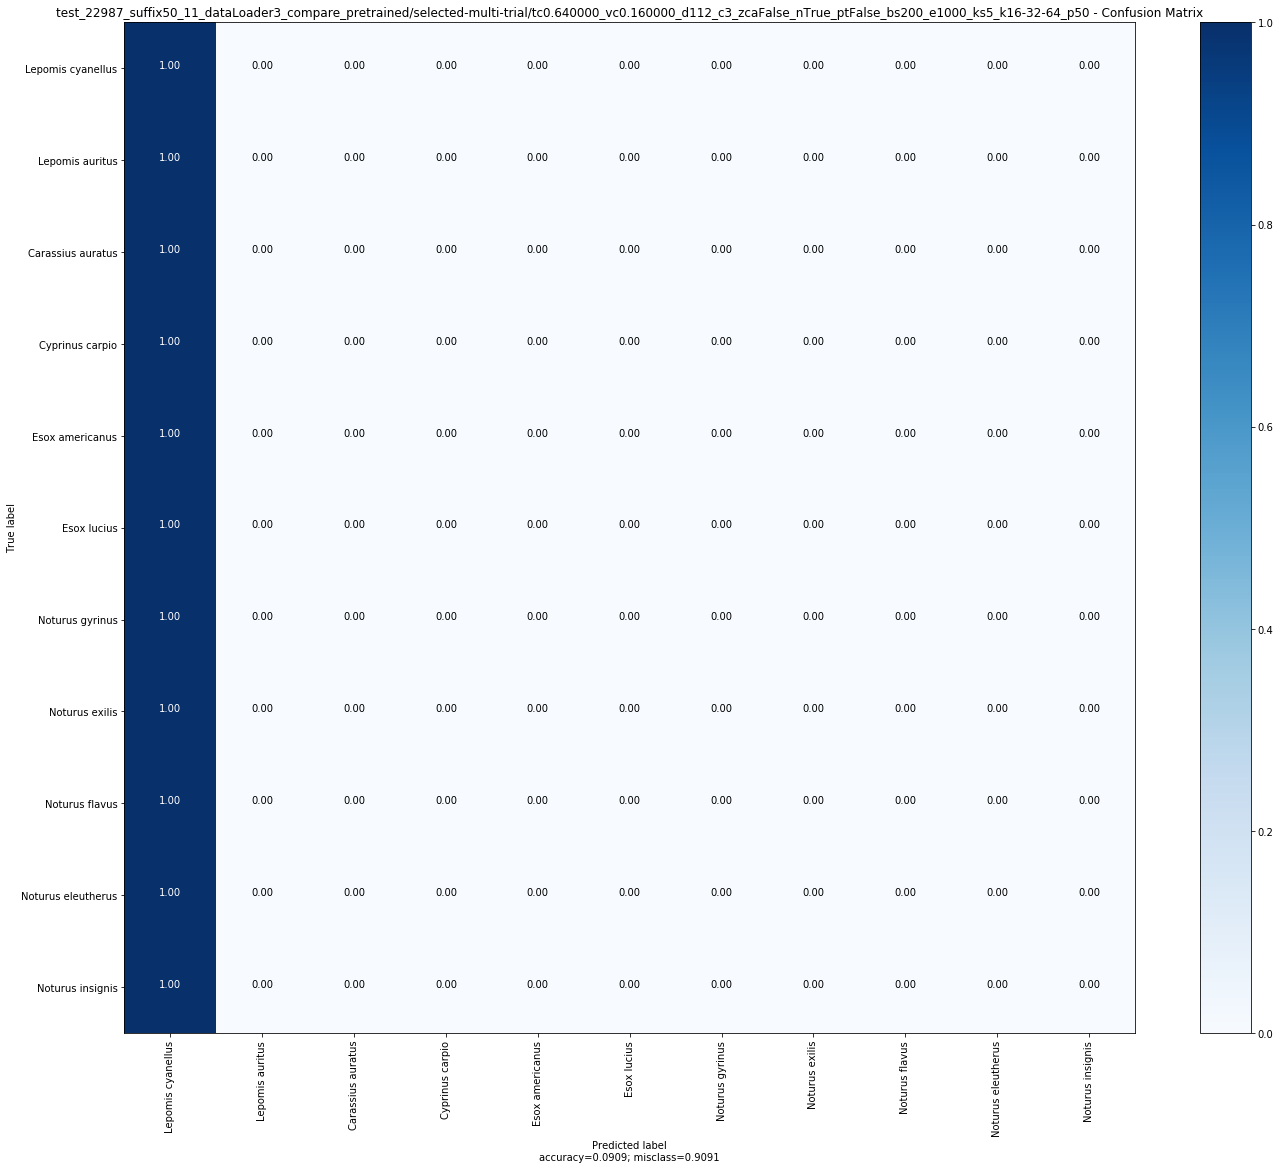

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': False, 'imageDimension': 112, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': (16, 32, 64), 'kernelSize': 5, 'patience': 50}
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d112_c3_zcaFalse_nFalse_ptFalse/dataset.pkl read


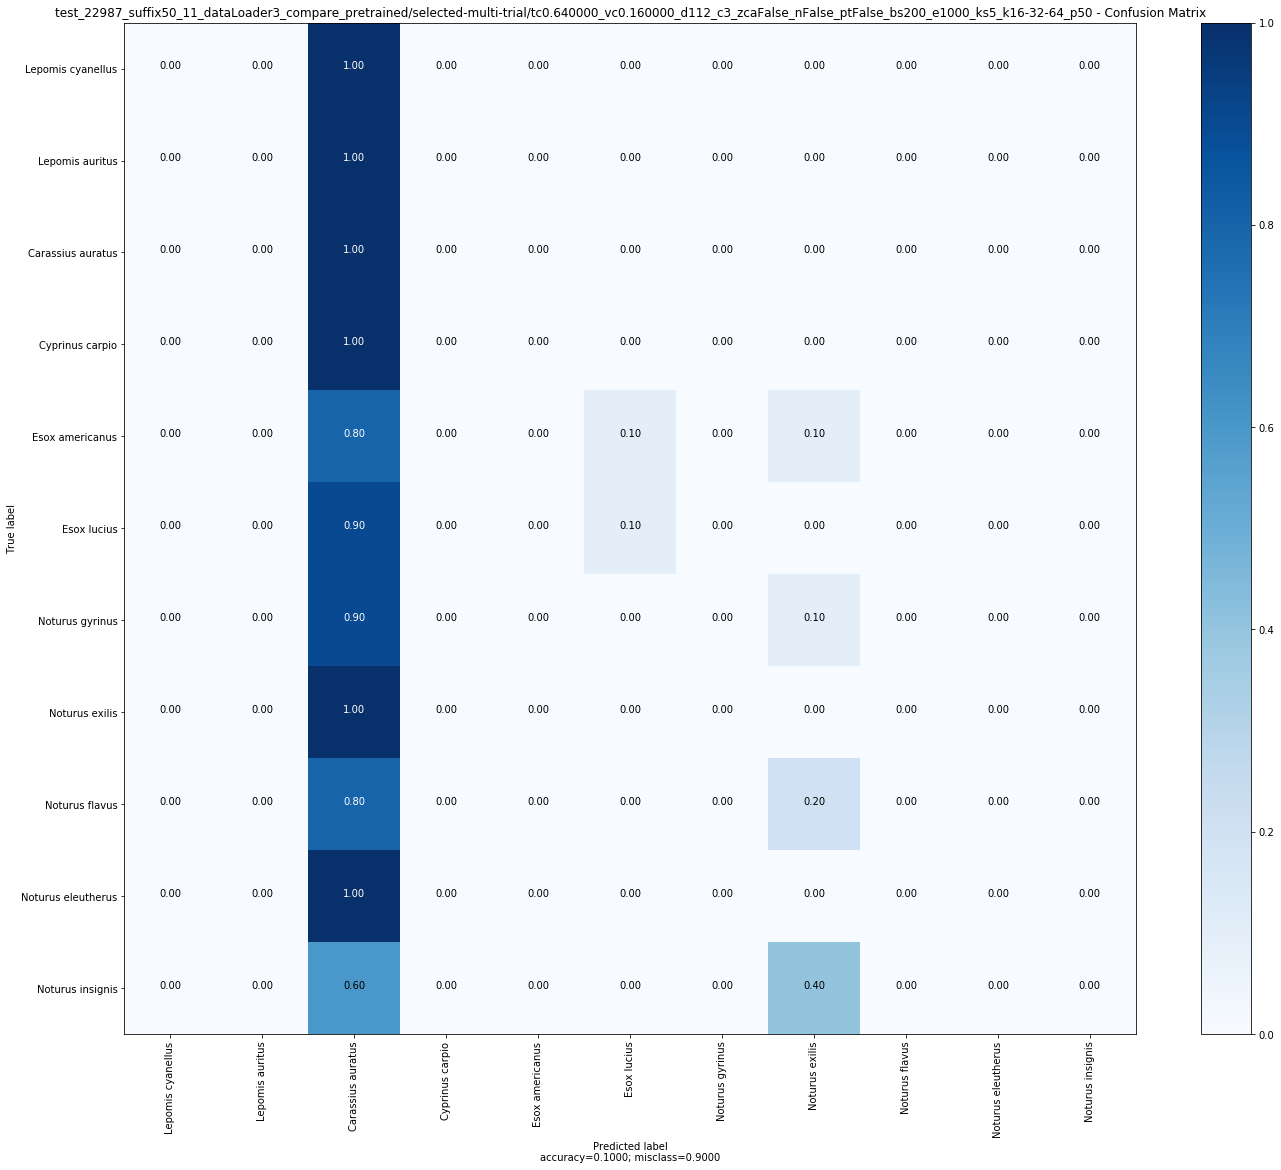

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': False, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': True, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': (16, 32), 'kernelSize': 5, 'patience': 50}
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d56_c3_zcaFalse_nTrue_ptFalse/dataset.pkl read


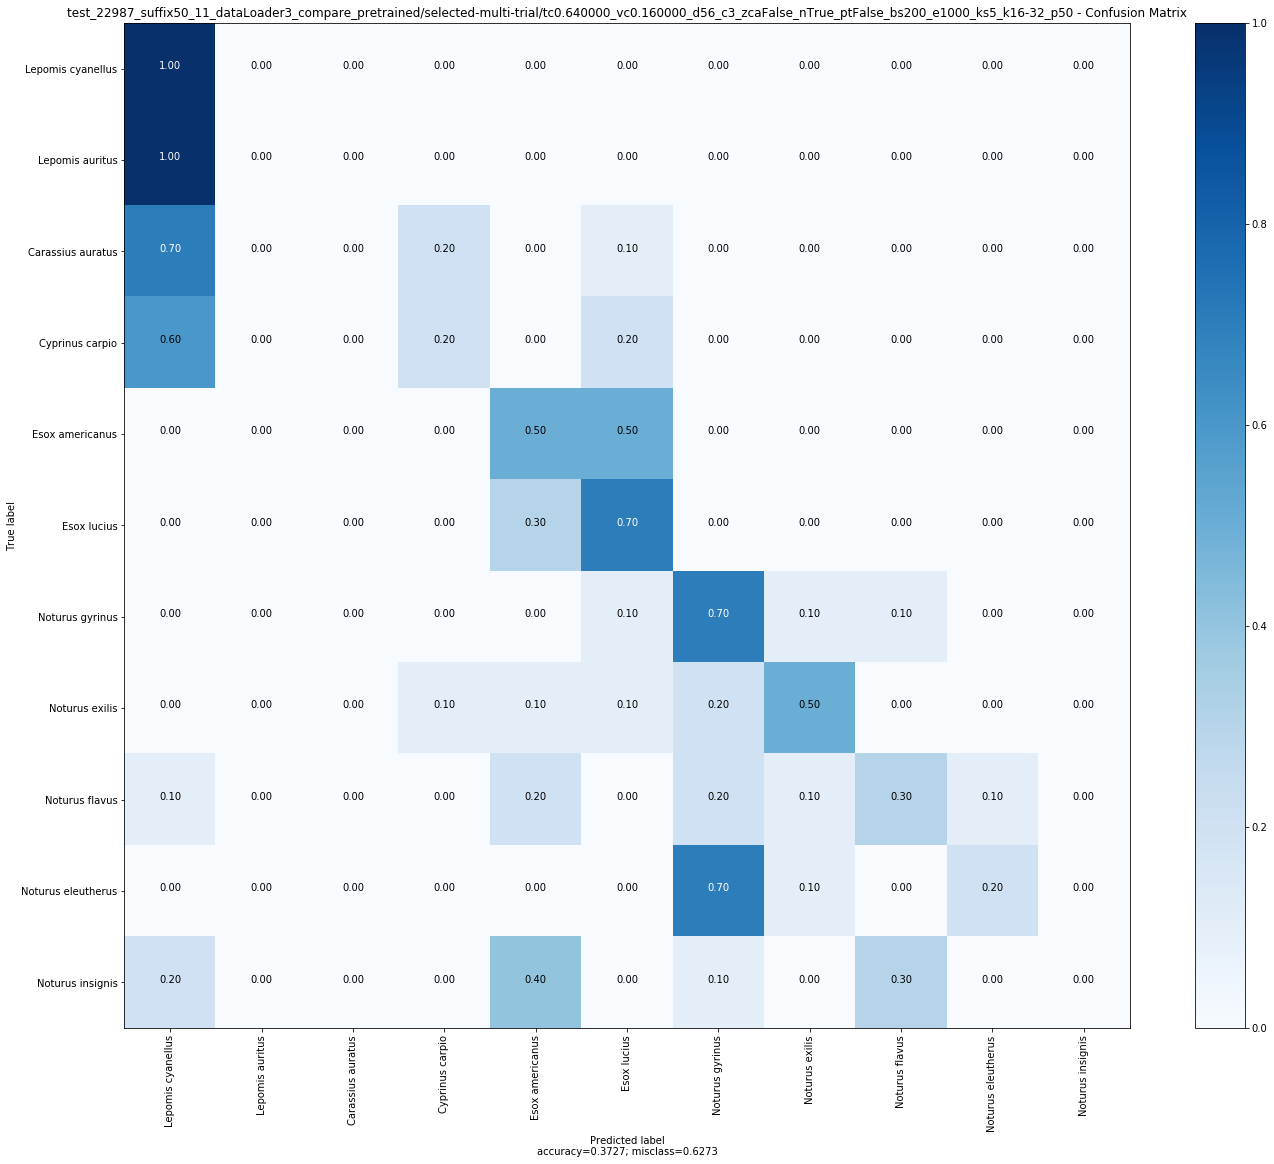

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': False, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': (16, 32), 'kernelSize': 5, 'patience': 50}
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_compare_pretrained/selected-multi-trial/tc0.640000_vc0.160000_d56_c3_zcaFalse_nFalse_ptFalse/dataset.pkl read


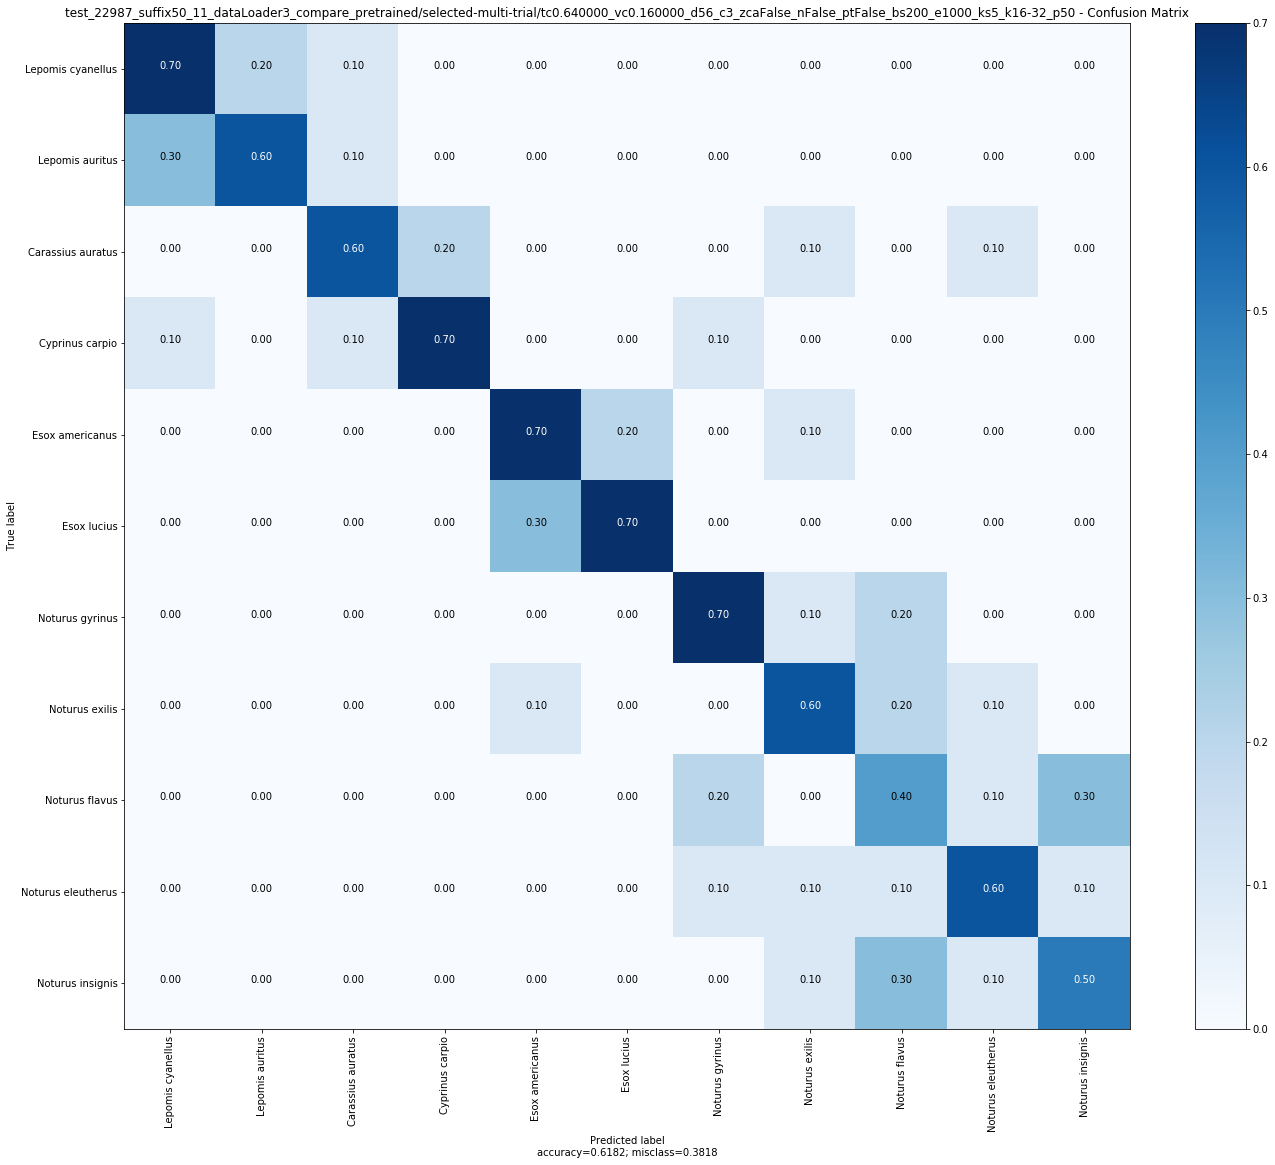

In [8]:
paramsIterator = config_parser.getHyperpSelectedIter() 
for experiment_params in paramsIterator:
    experiment_params["numOfTrials"] = experiment_params["numOfTrials"] or 1
    
    print("experiment: ", experiment_params)
    
    datasetManager.updateParams(experiment_params)
    dataset = datasetManager.getDataset()
    speciesList = dataset.getSpeciesList()
    ts.printTrialConfusionMatrix(experiment_params, speciesList, True)